In [13]:
import os
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,corrmap)
import numpy as np

In [2]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)


raw.crop(tmax=60.).pick_types(meg='mag', eeg=True, stim=True, eog=True)
raw.load_data()

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|#####################################| 1.65G/1.65G [00:00<00:00, 1.60TB/s]
Untarring contents of 'C:\Users\USER\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\USER\mne_data'


Attempting to create new mne-python configuration file:
C:\Users\USER\.mne\mne-python.json
Opening raw data file C:\Users\USER\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 9009  =      0.000 ...    59.999 secs...


<Raw | sample_audvis_filt-0-40_raw.fif, 171 x 9010 (60.0 s), ~14.8 MB, data loaded>

Opening raw-browser...


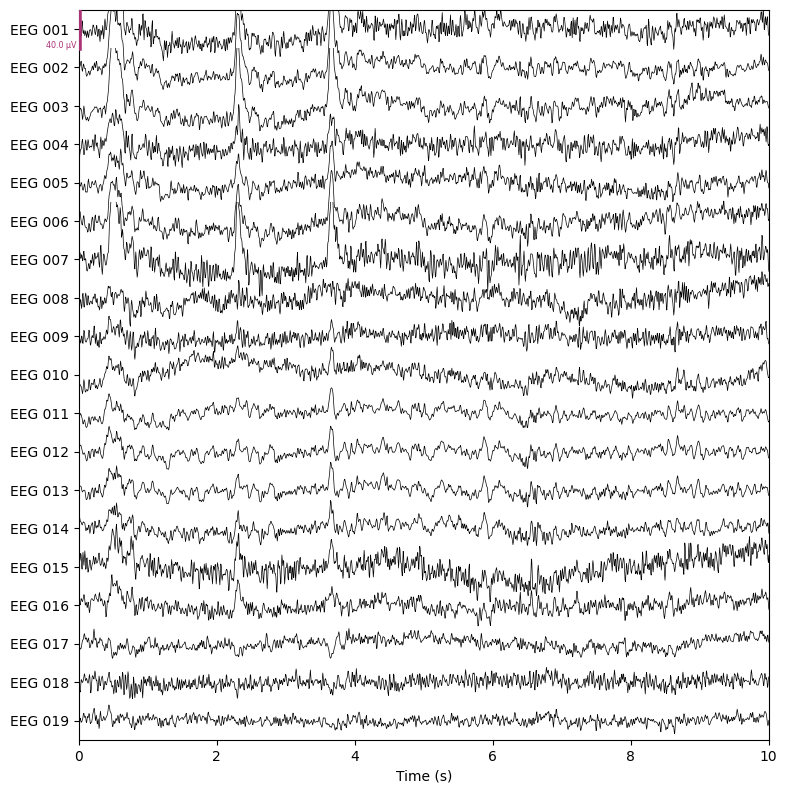

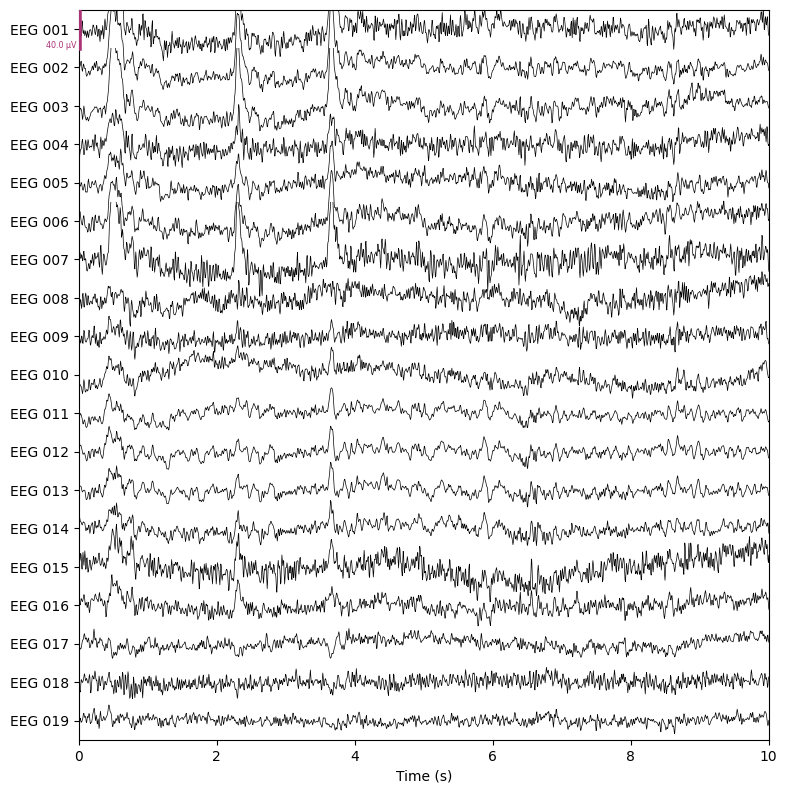

In [20]:
regexp = r'(EEG 00.|EEG 01.)'
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks),show_scrollbars=False, color= 'k')

Using EOG channel: EOG 061
EOG channel index for this subject is: [170]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1502 samples (10.003 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 4)
Using data from preloaded Raw for 10 events and 151 original time points ...
0 bad epochs dropped
Applying baseline c

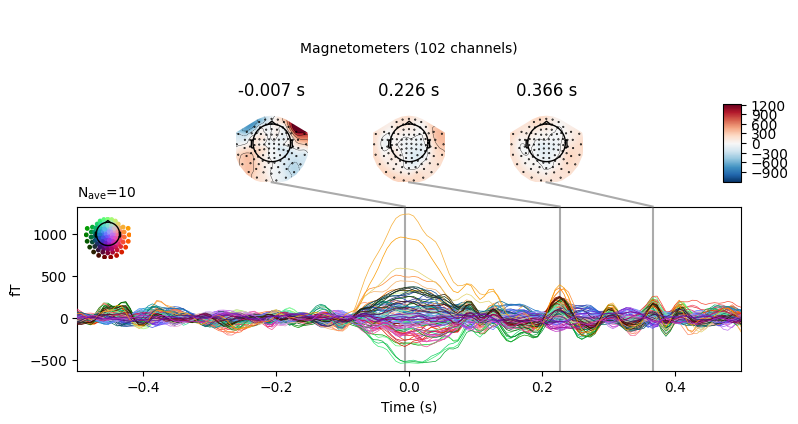

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


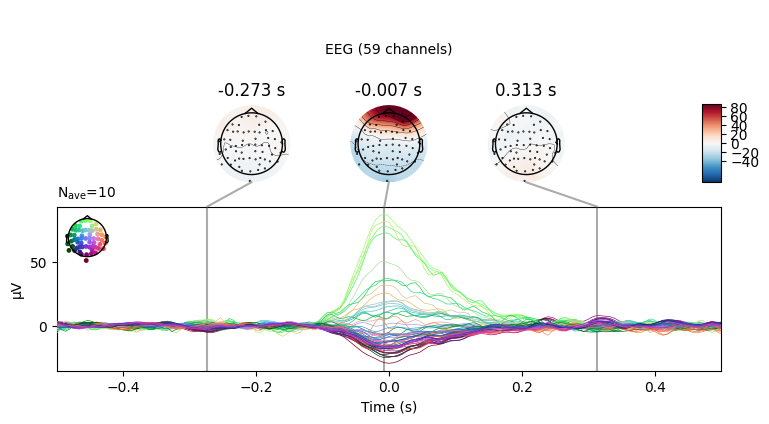

[<Figure size 800x420 with 7 Axes>, <Figure size 800x420 with 7 Axes>]

In [6]:
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 1502 samples (10.003 sec)

Number of ECG events detected : 59 (average pulse 58 / min.)
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 4)
Using data from preloaded Raw for 59 events and 151 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
SSP projectors applied...
Removing projector <Projection | Aver

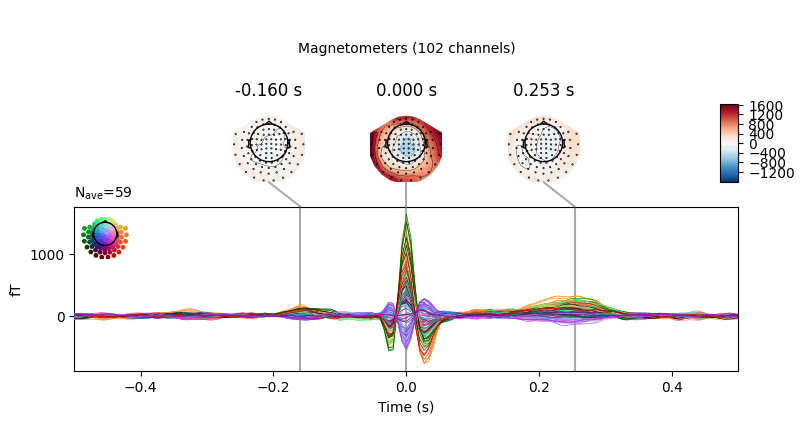

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


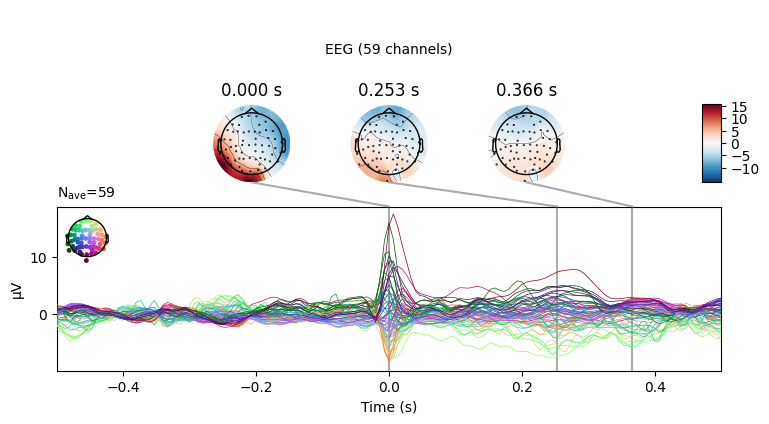

[<Figure size 800x420 with 7 Axes>, <Figure size 800x420 with 7 Axes>]

In [7]:
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

In [8]:
filt_raw = raw.copy().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 497 samples (3.310 sec)



In [30]:
ica = ICA(n_components=10, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica

Fitting ICA to data using 161 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.1s.


Method,fastica
Fit,24 iterations on raw data (9010 samples)
ICA components,10
Explained variance,90.6 %
Available PCA components,161
Channel types,"mag, eeg"
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=11, n_times=9010
    Range : 6450 ... 15459 =     42.956 ...   102.954 secs
Ready.
Opening ica-browser...


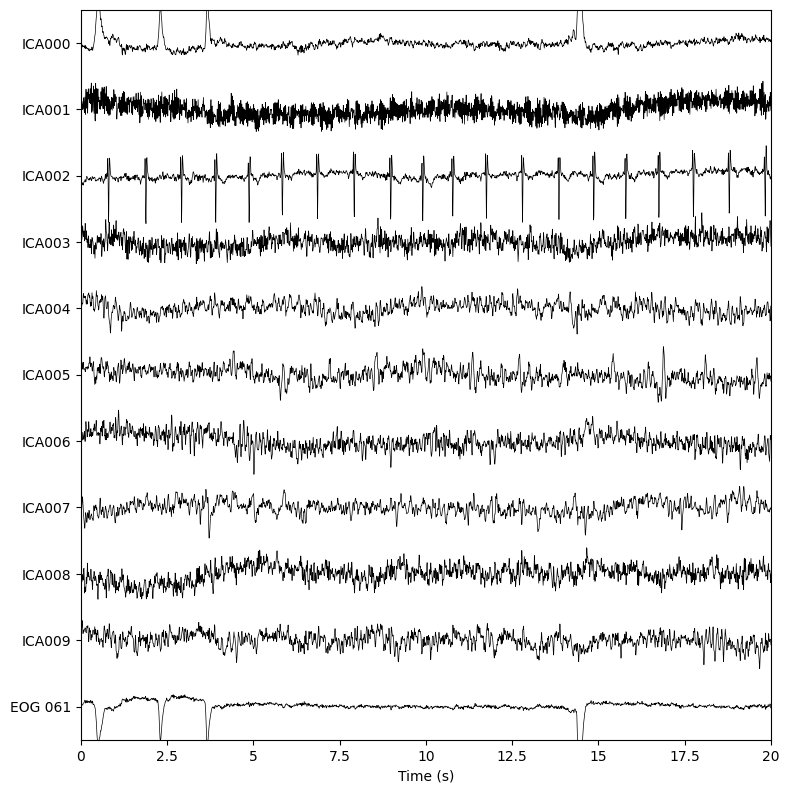

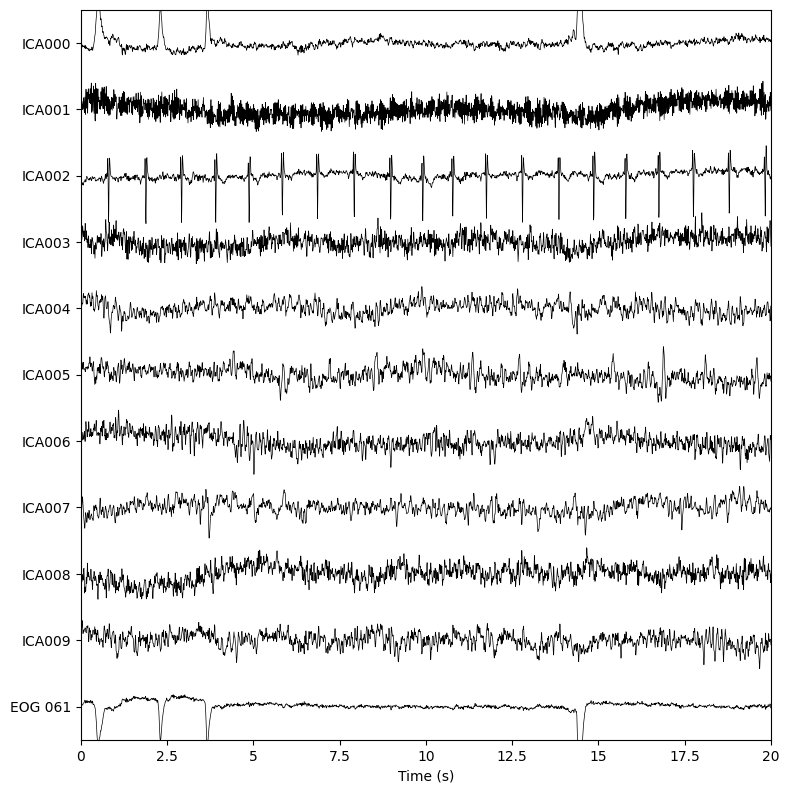

In [31]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 2 ICA components
    Projecting back using 161 PCA components
Opening raw-browser...


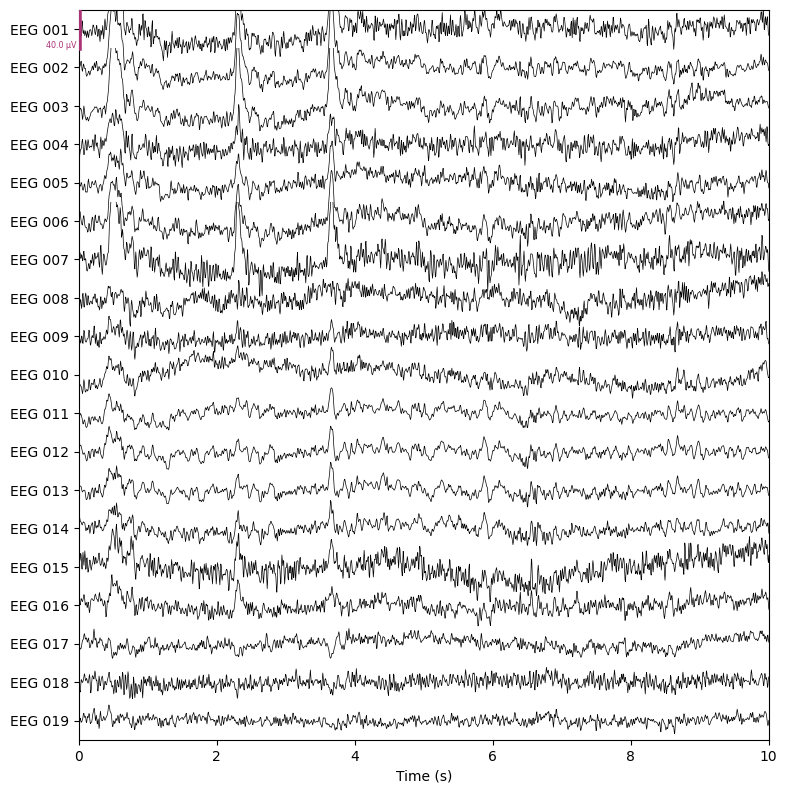

Opening raw-browser...


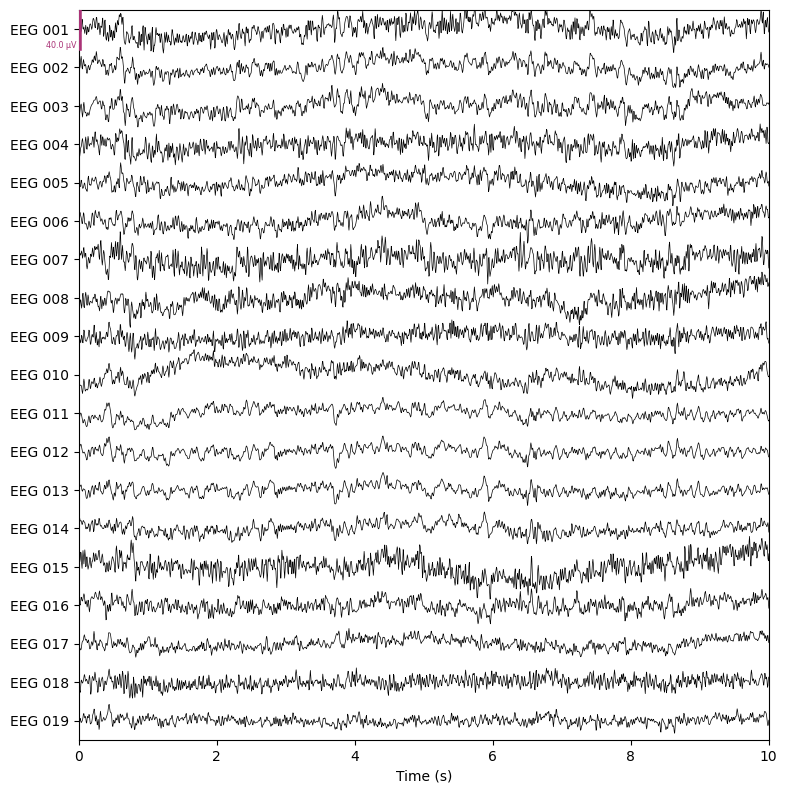

In [32]:
ica.exclude = [0, 1]
reconst_raw = raw.copy()
ica.apply(reconst_raw)

raw.plot(order=artifact_picks, n_channels=len(artifact_picks),
         show_scrollbars=False)
reconst_raw.plot(order=artifact_picks, n_channels=len(artifact_picks),
                 show_scrollbars=False)
del reconst_raw